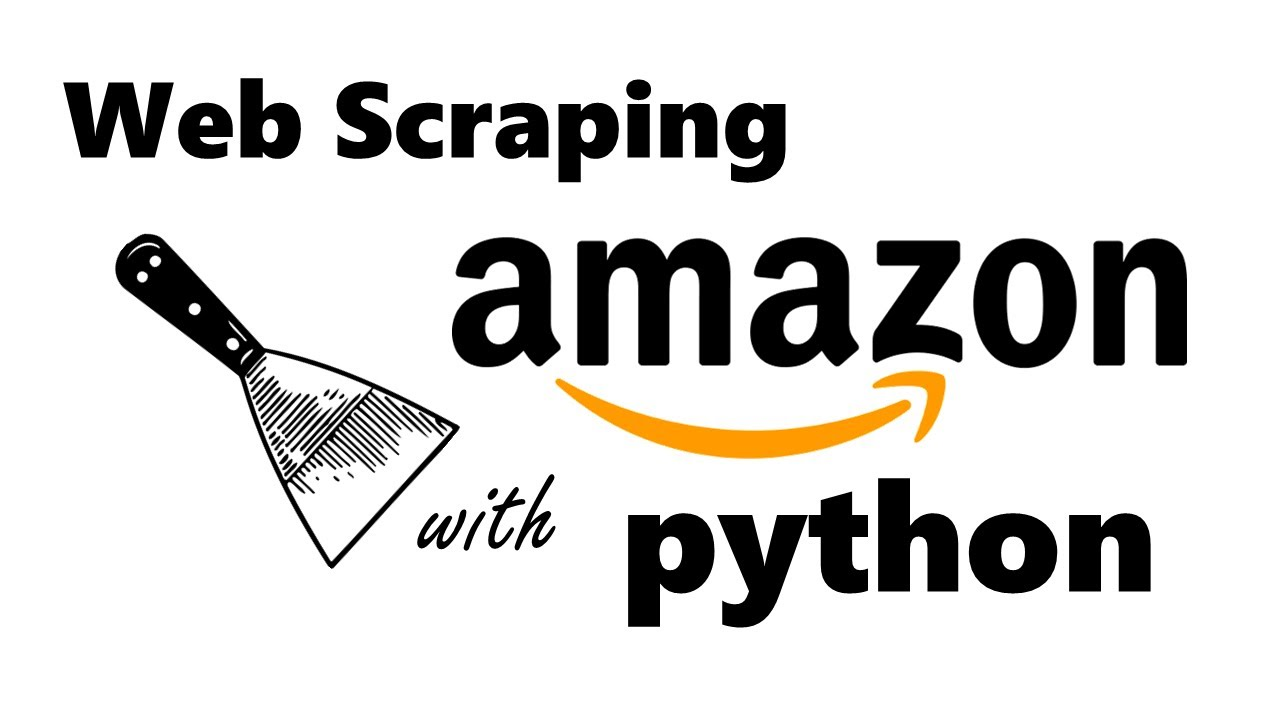

# Introduction

To begin with, the necessary libraries needs to be imported.

**WebDriver**: drives a browser natively, as a user would, either locally or on a remote machine using the Selenium server, marks a leap forward in terms of browser automation.

**Selenium WebDriver**: refers to both the language bindings and the implementations of the individual browser controlling code. This is commonly referred to as just WebDriver.

**Beautiful Soup**: is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree.

**Pandas**: is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. Used for dataframe manupulations.

## Adding Libraries

In [1]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import chromedriver_binary
import requests
import pandas as pd
import numpy as np

## Structuring a URL

https://www.amazon.in/s?k=smart+phone&page=1&qid=1637435675&ref=sr_pg_1

https://www.amazon.in/s?k=smart+phone&page=2&qid=1637435675&ref=sr_pg_2

When we look closely at the **urls**, we can see that both the *urls* have the domain **https://www.amazon.in/** followed by the *search string*, then the *page number* and then again *page number* as shown below.
**Search string**: should be entered as `a+b`, example **smart watch** can be written as **smart+watch**

Hence generic url is:

**https://www.amazon.in/s?k={}&page={}&qid=1637435675&ref=sr_pg_{}**

## Constructing a function to scrap amazon data

In [13]:
def amazon_scrap(keyword , page):
    keyword1 = keyword.replace(' ' , '+')
    
    # generic website url
    job_url = 'https://www.amazon.in/s?k={}&page={}&qid=1637435675&ref=sr_pg_{}'
    
    # making empty lists to contains data
    names = []
    prices = []
    ratings = []
    no_ratings=[]
    product_imgs=[]
    
    # looping pages
    for i in range(1,page+1):
        
        # constructing url as per the input
        new_job_url = job_url.format(keyword1 , i , i)
        
        # Open chrome automatically
        driver = webdriver.Chrome(ChromeDriverManager().install())
        driver.get(new_job_url)
        soup = BeautifulSoup(driver.page_source , 'html.parser')
        
        # Looping over tiles of data
        for main in soup.findAll('div' , attrs = {'class' : 's-card-container s-overflow-hidden aok-relative puis-include-content-margin puis s-latency-cf-section s-card-border'}):
            # extracting name of product
            name = main.find('span' , attrs = {'class' : 'a-size-medium a-color-base a-text-normal'})
            # extracting price of product
            price = main.find('span' , attrs = {'class' : 'a-price-whole'})
            # extracting ratings of product
            rating = main.find('i' , attrs = {'class' : ['a-icon a-icon-star-small a-star-small-1-5 aok-align-bottom','a-icon a-icon-star-small a-star-small-5 aok-align-bottom','a-icon a-icon-star-small a-star-small-4 aok-align-bottom','a-icon a-icon-star-small a-star-small-4-5 aok-align-bottom','a-icon a-icon-star-small a-star-small-3-5 aok-align-bottom','a-icon a-icon-star-small a-star-small-3 aok-align-bottom']})
            # extracting number of ratings of product
            no_rating = main.find('span' , attrs = {'class' : 'a-size-base'})
            # extracting image of product
            img = main.find('div' , attrs = {'class' : 'a-section aok-relative s-image-fixed-height'})
            product_img = img.find_all('img' , src = True)
            # To extract image url we need to extract image src url. So its under tag 'div' and class 'a-section aok-relative s-image-fixed-height'
            # Add with tag 'img' hence we make src True as we need to src text/url.
            
            # Loading data into lists
            if name is not None:
                names.append(name.getText())
            else:
                names.append('Not Found')

            if price is not None:
                prices.append(price.getText())
            else:
                prices.append('Not Found')

            if rating is not None:
                ratings.append(rating.getText())
            else:
                ratings.append('Not Found')

            if no_rating is not None:
                no_ratings.append(no_rating.getText())
            else:
                no_ratings.append('Not Found')

            if product_img is not None:
                product_imgs.append(product_img[0]['src'])
            else:
                product_imgs.append('Not Found')

    # Making a dictionary to merge all the lists
    data = {
        'Name':names,
        'Price':prices,
        'Ratings':ratings,
        'Number of Ratings':no_ratings,
        "Product's Image":product_imgs
    }
    
    # Converting dictionary to DataFrame
    df = pd.DataFrame(data)
    
    
    # converting DataFrame into csv file
    df.to_csv('{}+{}+pages-scraped-data.csv'.format(keyword1,page) , index=False)
    
    print('Data has been scrapped successfully!')

In [14]:
amazon_scrap('smart tv' , 1)

<ipython-input-13-e0f70f4c597b>:21: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


Data has been scrapped successfully!
